In [1]:
import numpy
from galpy import potential
from galpy.orbit import Orbit
from astropy import units as u
%pylab inline
from galpy.util import plot as galpy_plot
galpy_plot.start_print(axes_labelsize=17.,text_fontsize=12.,
                       xtick_labelsize=15.,ytick_labelsize=15.)

Populating the interactive namespace from numpy and matplotlib


# Chaos in the Milky Way

In the lectures, we discussed the Henon & Heiles (1964) potential and how it exhibits chaotic regions. Let’s see whether more realistic galactic potentials have chaotic regions!

## Preliminaries

The following is a model for the Milky Way's gravitational potential from [Helmi (2004)](https://ui.adsabs.harvard.edu/abs/2004MNRAS.351..643H/abstract). We'll investigate whether it has chaos!

In [2]:
pot= [potential.HernquistPotential(amp=2.*3.4*10.**10.*u.Msun,a=0.7*u.kpc),
      potential.MiyamotoNagaiPotential(amp=10.**11.*u.Msun,a=6.5*u.kpc,b=0.26*u.kpc),
      potential.LogarithmicHaloPotential(amp=(131.**2.*2.)*u.km**2./u.s**2.,core=12.*u.kpc,q=1.)]

We can look at the rotation curve:

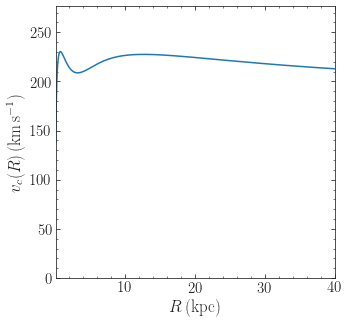

In [3]:
potential.plotRotcurve(pot);

That looks like a decent representation of the Milky Way's rotation curve.

The functions below work best when we work in ``galpy``'s internal units, so we turn physical outputs off:

In [4]:
potential.turn_physical_off(pot)

Next we define some functions that make investigating surfaces of section easier. First a function that gives the energy of a circular orbit at a given radius:

In [5]:
def ERc(Rc,pot):
    """Returns the energy of a circular orbit at Rc"""
    return 0.5*potential.vcirc(pot,Rc)**2.+potential.evaluatePotentials(pot,Rc,0.)

Then a function that returns the angular momentum of that circular orbit, which is $R_c \times v_c(R_c)$:

In [6]:
def Lc(Rc,pot):
    """Returns the angular momentum of a circular orbit at Rc"""
    return Rc*potential.vcirc(pot,Rc)

Then we use the same function that we used in the notes to initialize an orbit with a given energy $E$, $z$-component of the angular momentum $L_z$, and initial value of the radial velocity $v_R$:

In [7]:
def orbit_RvRELz(R,vR,E,Lz,pot=None):
    """Returns Orbit at (R,vR,phi=0,z=0) with given (E,Lz)"""
    return Orbit([R,vR,Lz/R,0.,
                  numpy.sqrt(2.*(E-potential.evaluatePotentials(pot,R,0.)
                                 -(Lz/R)**2./2.-vR**2./2)),0.],ro=8.,vo=220.)

To be able to scan through different values of $v_R$ at a given $(E,L_z)$, we also define a function that gives the maximum value of $v_R$ at a given $(E,L_z)$ (then we can just explore values from $v_R = 0$ to $v_{R,\mathrm{max}})$):

In [8]:
def maxvR_RELz(R,E,Lz,pot=None):
    """Returns maximum v_R for orbit at (R,phi=0,z=0) with given (E,Lz)"""
    return numpy.sqrt(2.*(E-potential.evaluatePotentials(pot,R,0.))-(Lz/R)**2.)

We also need the function of the notes that computes the $z=0$ surface of section given an orbit integration:

In [9]:
def surface_section(Rs,zs,vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs= numpy.roll(zs,-1)
    indx= (zs[:-1] < 0.)*(shiftzs[:-1] > 0.)
    return (Rs[:-1][indx],vRs[:-1][indx])

Now we're ready to start exploring!

## Chaos at $R_c = 30$ kpc?

Let's start by seeing whether we can find any chaos for orbits similar to the circular orbit at 30 kpc from the center. We use an energy $E$ that is equal to that of the circular orbit at 30 kpc and an angular momentum that is 15% of the angular momentum of the circular orbit:

In [10]:
Rc= 30./8 # division by 8 kpc to go to internal units
thisE= ERc(Rc,pot)
thisL= 0.15*Lc(Rc,pot)

**Now explore the surface of section for different values of $v_R$**: Look at the surface of section for some values of $v_R$, can you find chaos? (note that we have to integrate for a long time to get a nice surface of section, so these orbits will take about 10 seconds to compute). If you find any interesting surfaces of section, make a note of the $v_R$ so you can show them to your classmates later!

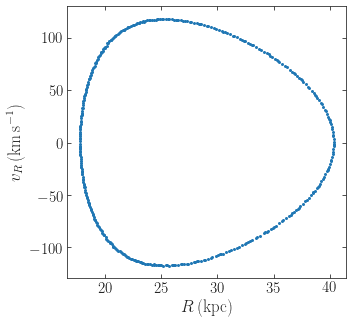

In [11]:
vR= 0.5*maxvR_RELz(Rc,thisE,thisL,pot=pot)

ts= numpy.linspace(0.,10000.,1000001)
o= orbit_RvRELz(Rc,vR,thisE,thisL,pot=pot)
o.integrate(ts,pot)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
plot(sect1Rs,sect1vRs,'.',mec='none')
xlabel(r'$R\,(\mathrm{kpc})$')
ylabel(r'$v_R\,(\mathrm{km\,s}^{-1})$');

## Chaos at $R_c = 9$ kpc?

Now let's see whether we can find any chaos for orbits similar to the circular orbit at 9 kpc from the center. We use an energy $E$ that is equal to that of the circular orbit at 9 kpc and again an angular momentum that is 15% of the angular momentum of the circular orbit:

In [12]:
Rc= 9./8 # division by 8 kpc to go to internal units
thisE= ERc(Rc,pot)
thisL= 0.15*Lc(Rc,pot)

**Now explore the surface of section for different values of $v_R$**: Look at the surface of section for some values of $v_R$, can you find chaos? (note that we have to integrate for a long time to get a nice surface of section, so these orbits will take about 10 seconds to compute). If you find any interesting surfaces of section, make a note of the $v_R$ so you can show them to your classmates later!

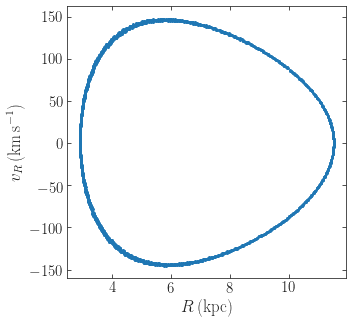

In [13]:
vR= 0.5*maxvR_RELz(Rc,thisE,thisL,pot=pot)

ts= numpy.linspace(0.,10000.,1000001)
o= orbit_RvRELz(Rc,vR,thisE,thisL,pot=pot)
o.integrate(ts,pot)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
plot(sect1Rs,sect1vRs,'.',mec='none')
xlabel(r'$R\,(\mathrm{kpc})$')
ylabel(r'$v_R\,(\mathrm{km\,s}^{-1})$');

## Chaos at $R_c = 30$ kpc for a prolate halo?

The halo in the model that we have looked at so far is spherical. A non-spherical halo may have more chaotic orbits, as orbits are less constrained by symmetry. Let's re-do our initial analysis of chaos at 30 kpc but using a prolate halo instead. To construct such a halo, we use the same Milky-Way model as before, but use a flattening parameter of $q=1.25$ in the definition of the halo:

In [14]:
pot= [potential.HernquistPotential(amp=2.*3.4*10.**10.*u.Msun,a=0.7*u.kpc),
      potential.MiyamotoNagaiPotential(amp=10.**11.*u.Msun,a=6.5*u.kpc,b=0.26*u.kpc),
      potential.LogarithmicHaloPotential(amp=(131.**2.*2.)*u.km**2./u.s**2.,core=12.*u.kpc,q=1.25)]

The rotation curve is pretty similar to what it was before:

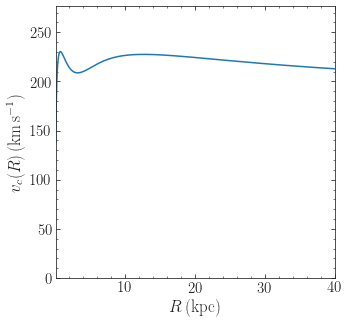

In [15]:
potential.plotRotcurve(pot);
potential.turn_physical_off(pot)

Let's now again investigate whether we can find any chaos for orbits similar to the circular orbit at 30 kpc from the center. We use an energy $E$ that is equal to that of the circular orbit at 30 kpc and again an angular momentum that is 15% of the angular momentum of the circular orbit:

In [16]:
Rc= 30./8 # division by 8 kpc to go to internal units
thisE= ERc(Rc,pot)
thisL= 0.15*Lc(Rc,pot)

**Now explore the surface of section for different values of $v_R$**: Look at the surface of section for some values of $v_R$, can you find chaos? (note that we have to integrate for a long time to get a nice surface of section, so these orbits will take about 10 seconds to compute). If you find any interesting surfaces of section, make a note of the $v_R$ so you can show them to your classmates later!

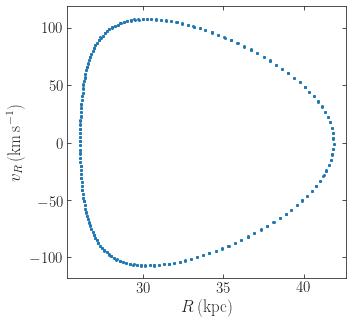

In [17]:
vR= 0.5*maxvR_RELz(Rc,thisE,thisL,pot=pot)

ts= numpy.linspace(0.,10000.,1000001)
o= orbit_RvRELz(Rc,vR,thisE,thisL,pot=pot)
o.integrate(ts,pot)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
plot(sect1Rs,sect1vRs,'.',mec='none')
xlabel(r'$R\,(\mathrm{kpc})$')
ylabel(r'$v_R\,(\mathrm{km\,s}^{-1})$');

You may have to start the orbit at a different $R$ to fully explore the surface of section (the first argument of ``orbit_RvRELz``).